In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
import random
import numpy as np

In [7]:
x_train=np.loadtxt('input.csv',delimiter=',')
x_test=np.loadtxt('input_test.csv',delimiter=',')

y_train=np.loadtxt('labels.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [9]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2000, 30000)
x_test shape (400, 30000)
y_train shape (2000,)
y_test shape (400,)


In [11]:
x_train=x_train.reshape(len(x_train),100,100,3)
x_test=x_test.reshape(len(x_test),100,100,3)

In [14]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255
x_test=x_test/255

In [15]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2000, 100, 100, 3)
x_test shape (400, 100, 100, 3)
y_train shape (2000, 1)
y_test shape (400, 1)


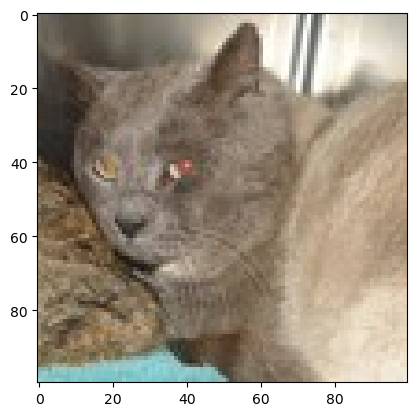

In [23]:
n=random.randint(0,len(x_train))
plt.imshow(x_train[n,:]);

In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64);

Epoch 1/5
32/32 [==============================] - 3s 94ms/step - loss: 0.2763 - accuracy: 0.8910 - val_loss: 0.6966 - val_accuracy: 0.6625
Epoch 2/5
32/32 [==============================] - 3s 89ms/step - loss: 0.2541 - accuracy: 0.9005 - val_loss: 0.6780 - val_accuracy: 0.7075
Epoch 3/5
32/32 [==============================] - 3s 89ms/step - loss: 0.2112 - accuracy: 0.9195 - val_loss: 0.6845 - val_accuracy: 0.6775
Epoch 4/5
32/32 [==============================] - 3s 91ms/step - loss: 0.1614 - accuracy: 0.9475 - val_loss: 0.7266 - val_accuracy: 0.6950
Epoch 5/5
32/32 [==============================] - 3s 89ms/step - loss: 0.1494 - accuracy: 0.9515 - val_loss: 0.8169 - val_accuracy: 0.6850


In [31]:
model.evaluate(x_test,y_test);

13/13 [==============================] - 0s 15ms/step - loss: 0.8169 - accuracy: 0.6850


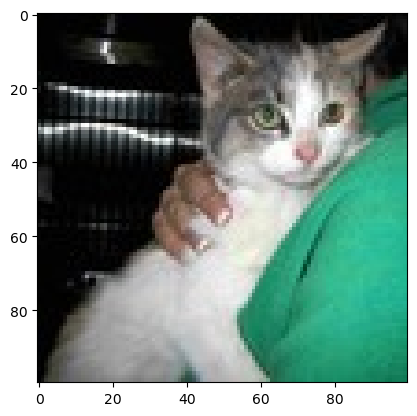

1/1 [==============================] - 0s 28ms/step
the animal in the picture is cat


In [43]:
m=random.randint(0,len(y_test))
plt.imshow(x_test[m,:])
plt.show()

y_pred=model.predict(x_test[m,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
    
    
print("the animal in the picture is",pred)    